In [ ]:
# Run the same code as previous analysis but will use PRAW to scrape reddit instead

In [ ]:
!pip install praw

In [2]:
# Import libraries
from praw import Reddit
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from google.colab import files
from datetime import datetime as dt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# Uploading the credentials to use reddit agent
uploaded = files.upload()

Saving reddit_scraping.csv to reddit_scraping.csv


In [4]:
# Create scraping agent
df = pd.read_csv('reddit_scraping.csv')
reddit = Reddit(client_id=df['client_id'][0], client_secret=df['secret'][0], user_agent=df['user_agent'][0])

In [5]:
subreddits = ['wallstreetbets', 'stocks']
filter_selfpost = True
posts = []
# Get top 20 hot self post (Filters out all link posts)
subreddit_instance = reddit.subreddit('+'.join(subreddits))

def get_reddit_table(posts, post):
  utc = dt.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
  date = utc.split(' ')[0]
  time = utc.split(' ')[1]
  posts.append([date, time, f"r/{post.subreddit}", post.title, post.selftext, post.num_comments, post.score, post.upvote_ratio, 
                f"https://www.reddit.com/r/{post.subreddit}/comments/{post.id}"])
  return

if filter_selfpost:
  while len(posts) <= 20:
    for post in subreddit_instance.hot(limit=100):
      if post.is_self:
        get_reddit_table(posts, post)
else:
  for post in subreddit_instance.hot(limit=20):
    get_reddit_table(posts, post)

df = pd.DataFrame(posts,columns=['Date', 'Time', 'Subreddit', 'Title', 'Body', 'Num_comments', 'Upvotes', 'Vote_ratio', 'Url'])
df

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,Date,Time,Subreddit,Title,Body,Num_comments,Upvotes,Vote_ratio,Url
0,2021-03-23,23:03:46,r/wallstreetbets,Short Squeeze potential confirmed. Taken from ...,[https://www.sec.gov/ix?doc=/Archives/edgar/da...,1432,12761,0.95,https://www.reddit.com/r/wallstreetbets/commen...
1,2021-03-24,01:01:22,r/wallstreetbets,"With regard to the ""they're just defining a sh...",Here's the thing about legal filings and CYA t...,511,5831,0.98,https://www.reddit.com/r/wallstreetbets/commen...
2,2021-03-23,18:30:15,r/wallstreetbets,GameStop Q4 Earnings Megathread 🍿,🍿 Post to be updated with links to the earning...,33222,35480,0.87,https://www.reddit.com/r/wallstreetbets/commen...
3,2021-03-23,22:35:55,r/wallstreetbets,GME 10~k filing mentions squeeze!,Edit Holy fuck this is real LOL - https://news...,296,3221,0.96,https://www.reddit.com/r/wallstreetbets/commen...
4,2021-03-23,21:51:27,r/wallstreetbets,Guys these people are saying we’re smart,We examine the market consequences of due dili...,116,2853,0.97,https://www.reddit.com/r/wallstreetbets/commen...
5,2021-03-23,22:38:43,r/stocks,Intel is spending $20 billion to build two new...,https://www.cnbc.com/2021/03/23/intel-is-spend...,93,190,0.96,https://www.reddit.com/r/stocks/comments/mbqtrm
6,2021-03-23,22:43:38,r/wallstreetbets,GME: 4 Additional Board Members Expected to le...,[Buried in the 10-K that Gamestop released tod...,137,1398,0.97,https://www.reddit.com/r/wallstreetbets/commen...
7,2021-03-23,12:30:13,r/wallstreetbets,"GME Megathread for March 23, 2021",We will be making a special earnings megathrea...,38433,30882,0.84,https://www.reddit.com/r/wallstreetbets/commen...
8,2021-03-23,17:46:39,r/wallstreetbets,Gamestop Can Only Go Up,&#x200B;\n\nTechnical Analysis doesn't mean to...,346,3395,0.93,https://www.reddit.com/r/wallstreetbets/commen...
9,2021-03-23,20:37:10,r/wallstreetbets,GME options chain.... just wow....,"Disclaimer, like I said in my previous posts, ...",267,1526,0.95,https://www.reddit.com/r/wallstreetbets/commen...


In [ ]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Apply Vader sentiment analysis to headlines
scores_title = df['Title'].apply(vader.polarity_scores).tolist()
scores_body = df['Body'].apply(vader.polarity_scores).tolist()
scores_df_title = pd.DataFrame(scores_title, columns=['compound', 'neg', 'neu', 'pos'])
scores_df_title.columns = ['comp_t', 'neg_t', 'neu_t', 'pos_t']
scores_df_body = pd.DataFrame(scores_body, columns=['compound', 'neg', 'neu', 'pos'])
scores_df_body.columns = ['comp_b', 'neg_b', 'neu_b', 'pos_b']
scores_df = scores_df_title.join(scores_df_body)
df = df.join(scores_df, rsuffix='_right')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Time,Subreddit,Title,Body,Num_comments,Upvotes,Vote_ratio,Url,comp_t,neg_t,neu_t,pos_t,comp_b,neg_b,neu_b,pos_b
Date,,,,,,,,,,,,,,,,
2021-03-02,16:04:46,r/stocks,Serious Question: If 99% of first-time day tra...,I hear it all the time - That first-time day t...,1306,5863,0.89,https://www.reddit.com/r/stocks/comments/lw5fn3,-0.5859,0.186,0.814,0.000,-0.4137,0.109,0.792,0.098
2021-03-02,17:19:17,r/stocks,I forgot my own strategy!,"Ok so I’ve been trading for about two years, I...",275,1251,0.94,https://www.reddit.com/r/stocks/comments/lw7bj2,0.0000,0.000,1.000,0.000,0.9513,0.127,0.621,0.252
2021-03-03,08:28:01,r/wallstreetbets,Something isn't right.,Edit 3: *ZJZ reply is at the top of the thread...,318,1059,0.89,https://www.reddit.com/r/wallstreetbets/commen...,0.0000,0.000,1.000,0.000,-0.9024,0.096,0.832,0.071
2021-03-03,03:01:13,r/stocks,Good news from NIO; but there are some who wan...,"Hey everyone,\n\nSo we recently got NIO's 2020...",73,158,0.84,https://www.reddit.com/r/stocks/comments/lwjk7s,0.3400,0.000,0.779,0.221,0.8262,0.085,0.809,0.106
2021-03-03,00:08:02,r/wallstreetbets,GME PLEASE READ,"Ok look apes, I have been following the GME tr...",604,4472,0.94,https://www.reddit.com/r/wallstreetbets/commen...,0.3182,0.000,0.465,0.535,-0.9759,0.108,0.815,0.077
2021-03-02,23:05:47,r/stocks,US companies that make no money have seen thei...,[https://www.pairagraph.com/dialogue/3b8e49dbd...,81,215,0.89,https://www.reddit.com/r/stocks/comments/lwf36b,0.1779,0.084,0.805,0.111,-0.5859,0.033,0.945,0.022
2021-03-02,22:39:46,r/wallstreetbets,Keep Your Eyes on the Volume Behind the Movement,**The Key to Success has Been Underneath Your ...,433,3751,0.98,https://www.reddit.com/r/wallstreetbets/commen...,0.0000,0.000,1.000,0.000,0.9909,0.040,0.841,0.120
2021-03-03,04:07:19,r/stocks,Airbnb (ABNB),"So airbnb just opened public last December, an...",60,65,0.85,https://www.reddit.com/r/stocks/comments/lwkrr8,0.0000,0.000,1.000,0.000,0.5940,0.022,0.897,0.080
2021-03-02,15:23:33,r/stocks,If predicting a crash was as easy as looking a...,Hi! I'm fairly new to investing and have been ...,231,687,0.96,https://www.reddit.com/r/stocks/comments/lw4g1x,0.0516,0.119,0.752,0.128,-0.9228,0.159,0.793,0.048


[]

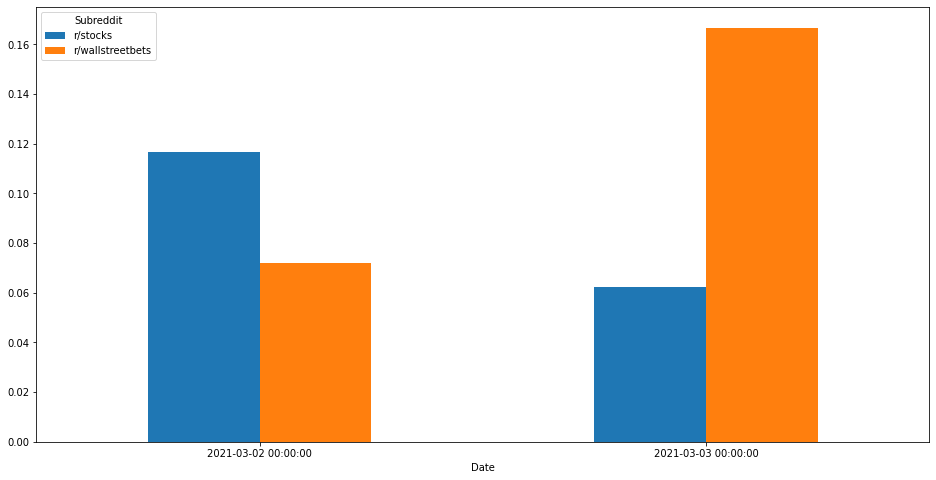

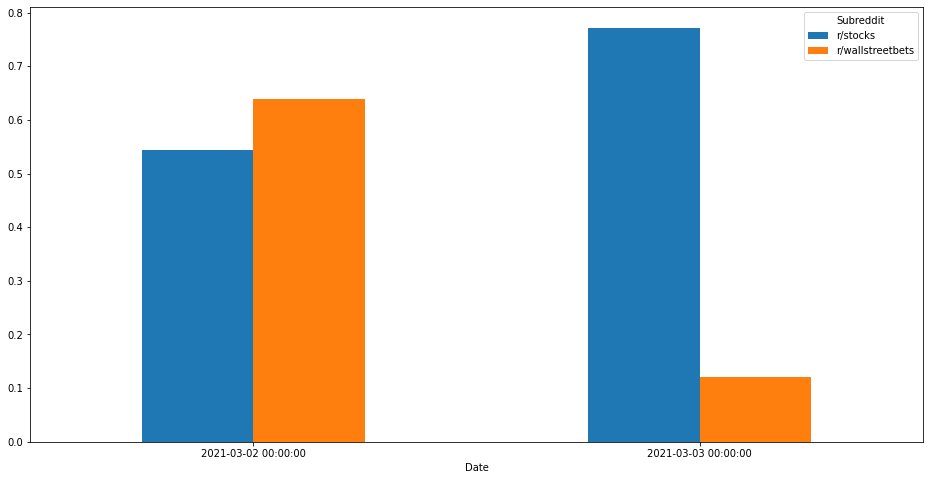

In [ ]:
# Group the scores by ticker and date
mean_scores = df.groupby(by=['Subreddit', 'Date']).mean()
mean_scores = mean_scores.unstack()
mean_scores_title = mean_scores.xs('comp_t', axis="columns").transpose()
mean_scores_body = mean_scores.xs('comp_b', axis="columns").transpose()
# Plot a bar graph
plt.rcParams['figure.figsize'] = [16, 8]
mean_scores_title.plot.bar(rot=0)
mean_scores_body.plot.bar(rot=0)
plt.plot()

In [ ]:
df.sort_index(ascending=False)
df

,Time,Subreddit,Title,Body,Num_comments,Upvotes,Vote_ratio,Url,comp_t,neg_t,neu_t,pos_t,comp_b,neg_b,neu_b,pos_b
Date,,,,,,,,,,,,,,,,
2021-03-02,16:04:46,r/stocks,Serious Question: If 99% of first-time day tra...,I hear it all the time - That first-time day t...,1306,5863,0.89,https://www.reddit.com/r/stocks/comments/lw5fn3,-0.5859,0.186,0.814,0.000,-0.4137,0.109,0.792,0.098
2021-03-02,17:19:17,r/stocks,I forgot my own strategy!,"Ok so I’ve been trading for about two years, I...",275,1251,0.94,https://www.reddit.com/r/stocks/comments/lw7bj2,0.0000,0.000,1.000,0.000,0.9513,0.127,0.621,0.252
2021-03-03,08:28:01,r/wallstreetbets,Something isn't right.,Edit 3: *ZJZ reply is at the top of the thread...,318,1059,0.89,https://www.reddit.com/r/wallstreetbets/commen...,0.0000,0.000,1.000,0.000,-0.9024,0.096,0.832,0.071
2021-03-03,03:01:13,r/stocks,Good news from NIO; but there are some who wan...,"Hey everyone,\n\nSo we recently got NIO's 2020...",73,158,0.84,https://www.reddit.com/r/stocks/comments/lwjk7s,0.3400,0.000,0.779,0.221,0.8262,0.085,0.809,0.106
2021-03-03,00:08:02,r/wallstreetbets,GME PLEASE READ,"Ok look apes, I have been following the GME tr...",604,4472,0.94,https://www.reddit.com/r/wallstreetbets/commen...,0.3182,0.000,0.465,0.535,-0.9759,0.108,0.815,0.077
2021-03-02,23:05:47,r/stocks,US companies that make no money have seen thei...,[https://www.pairagraph.com/dialogue/3b8e49dbd...,81,215,0.89,https://www.reddit.com/r/stocks/comments/lwf36b,0.1779,0.084,0.805,0.111,-0.5859,0.033,0.945,0.022
2021-03-02,22:39:46,r/wallstreetbets,Keep Your Eyes on the Volume Behind the Movement,**The Key to Success has Been Underneath Your ...,433,3751,0.98,https://www.reddit.com/r/wallstreetbets/commen...,0.0000,0.000,1.000,0.000,0.9909,0.040,0.841,0.120
2021-03-03,04:07:19,r/stocks,Airbnb (ABNB),"So airbnb just opened public last December, an...",60,65,0.85,https://www.reddit.com/r/stocks/comments/lwkrr8,0.0000,0.000,1.000,0.000,0.5940,0.022,0.897,0.080
2021-03-02,15:23:33,r/stocks,If predicting a crash was as easy as looking a...,Hi! I'm fairly new to investing and have been ...,231,687,0.96,https://www.reddit.com/r/stocks/comments/lw4g1x,0.0516,0.119,0.752,0.128,-0.9228,0.159,0.793,0.048
